# 1. Pendahuluan

# Analisis Penjualan Berdasarkan Kategori Produk

Notebook ini bertujuan untuk menganalisis data penjualan berdasarkan kategori produk dan melihat kontribusinya terhadap total penjualan. Selain itu, notebook ini juga menyertakan model prediksi penjualan sebagai bagian opsional.

# 2. Import Library

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("/content/store5.csv")
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.0,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.0,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.0,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.0,0,NaN
4,1456,2013-01-01,5,BOOKS,0.0,0,NaN


# 📌 3. Eksplorasi Awal

Cek tipe data, missing value, dan statistik dasar.

In [3]:
# Cek tipe data dan missing value
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB
None

Missing values:
id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     17193
dtype: int64


In [4]:
# Statistik deskriptif
df.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico
count,5.557200e+04,55572.0,55572.000000,55572.000000,38379.000000
mean,1.501021e+06,5.0,280.580231,2.687864,67.925589
std,8.662894e+05,0.0,652.588149,11.748996,25.666659
min,1.452000e+03,5.0,0.000000,0.000000,26.190000
25%,7.512365e+05,5.0,1.000000,0.000000,46.380000
50%,1.501021e+06,5.0,19.000000,0.000000,53.330000
75%,2.250806e+06,5.0,237.000000,0.000000,95.800000
max,3.000590e+06,5.0,8216.620000,182.000000,110.620000


# 📌 4. Analisis Penjualan per Kategori

In [5]:
# Total penjualan per kategori
kategori = df.groupby("family")["sales"].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
kategori["persentase"] = (kategori["sum"] / kategori["sum"].sum()) * 100
kategori.reset_index(inplace=True)
kategori.head()

,family,sum,mean,count,persentase
0,GROCERY I,5.262682e+06,3125.107873,1684,33.751572
1,BEVERAGES,2.533831e+06,1504.650238,1684,16.250419
2,CLEANING,1.667748e+06,990.349169,1684,10.695900
3,PRODUCE,1.653582e+06,981.937208,1684,10.605050
4,DAIRY,8.712830e+05,517.388955,1684,5.587868


# 📌 5. Visualisasi Penjualan

<ipython-input-6-01e552163ecd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kategori, x='sum', y='family', palette='rocket')


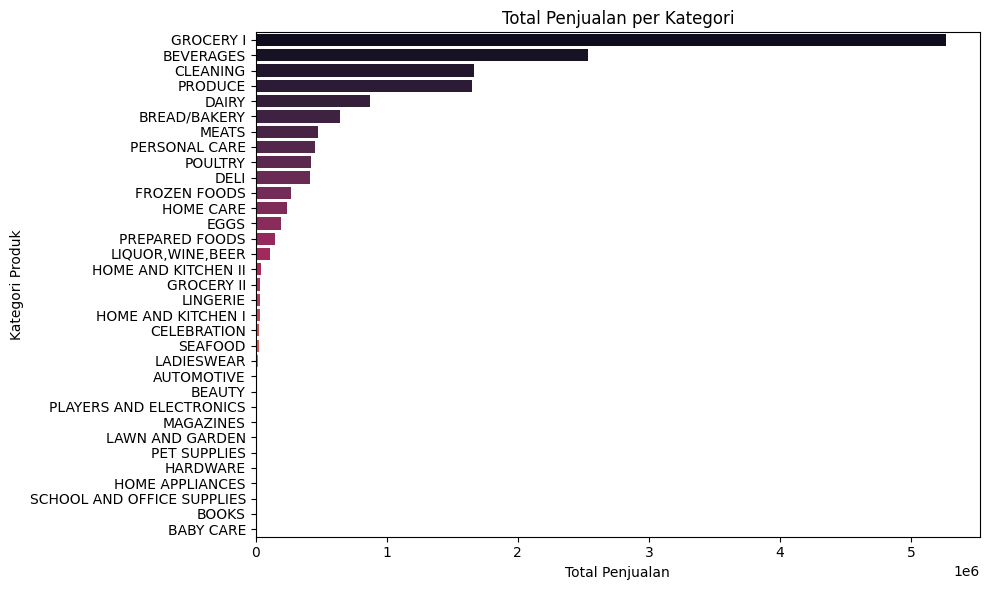

In [6]:
# Barplot total penjualan
plt.figure(figsize=(10,6))
sns.barplot(data=kategori, x='sum', y='family', palette='rocket')
plt.title("Total Penjualan per Kategori")
plt.xlabel("Total Penjualan")
plt.ylabel("Kategori Produk")
plt.tight_layout()
plt.show()

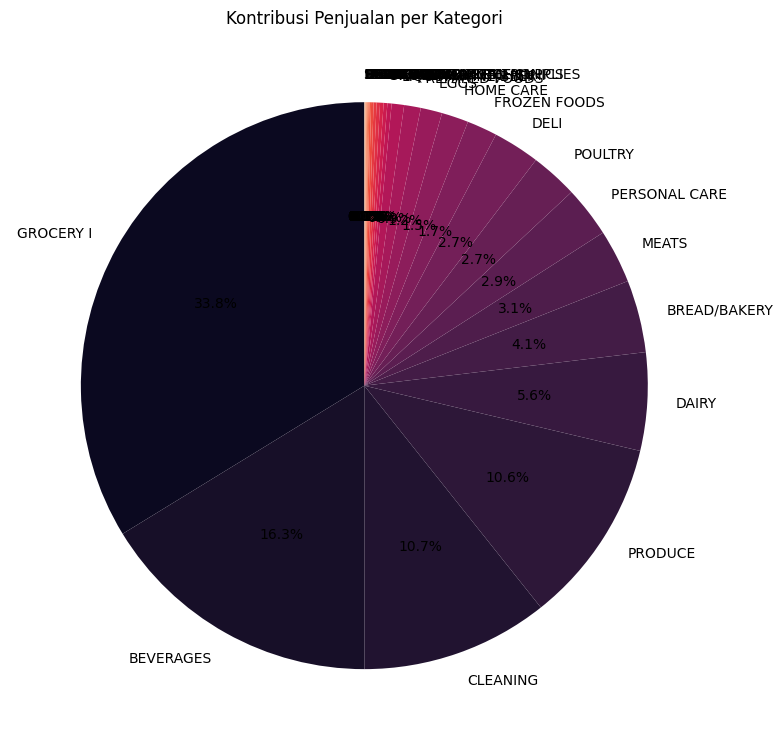

In [7]:
# Pie chart kontribusi
plt.figure(figsize=(8,8))
plt.pie(kategori["sum"], labels=kategori["family"], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("rocket", len(kategori)))
plt.title("Kontribusi Penjualan per Kategori")
plt.tight_layout()
plt.show()

# 📌 5. Analisis Autokorelasi Penjualan

<Figure size 1200x400 with 0 Axes>

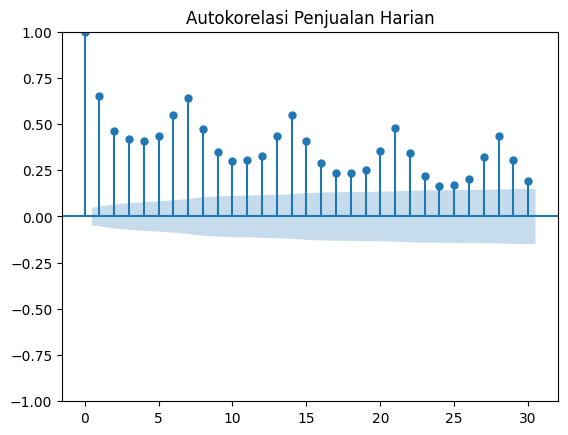

<Figure size 1200x400 with 0 Axes>

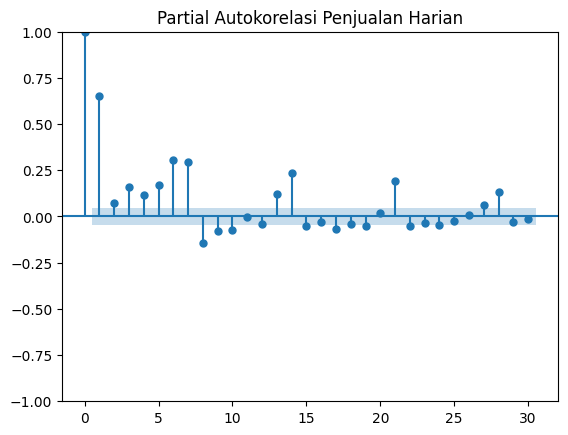

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ubah kolom tanggal
df["date"] = pd.to_datetime(df["date"])
penjualan_harian = df.groupby("date")["sales"].sum()

# Autokorelasi dan partial autocorrelation
plt.figure(figsize=(12,4))
plot_acf(penjualan_harian, lags=30)
plt.title("Autokorelasi Penjualan Harian")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(penjualan_harian, lags=30)
plt.title("Partial Autokorelasi Penjualan Harian")
plt.show()

# 📌 6. Prediksi Penjualan dengan Regresi Linear

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Salin data untuk modeling
df_model = df.copy()

In [11]:
# Ekstrak fitur waktu
df_model["year"] = df_model["date"].dt.year
df_model["month"] = df_model["date"].dt.month

In [12]:
# Isi missing value
df_model["dcoilwtico"].fillna(method="ffill", inplace=True)

<ipython-input-12-63aeb15c3c5d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model["dcoilwtico"].fillna(method="ffill", inplace=True)
<ipython-input-12-63aeb15c3c5d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_model["dcoilwtico"].fillna(method="ffill", inplace=True)


In [13]:
# Encoding kolom 'family'
df_model = pd.get_dummies(df_model, columns=["family"], drop_first=True)

In [14]:
# Tentukan fitur dan target
fitur = ["store_nbr", "onpromotion", "dcoilwtico", "year", "month"] + \
        [col for col in df_model.columns if col.startswith("family_")]

X = df_model[fitur].fillna(0)
y = df_model["sales"]

In [15]:
# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Buat model regresi
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
# Evaluasi hasil
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 48241.57519142387
R-squared (R²): 0.882043518796753


## 📌 Kesimpulan

- Kategori produk seperti *Grocery I* memiliki kontribusi terbesar terhadap total penjualan.
- Terdapat **autokorelasi** pada penjualan harian, menunjukkan adanya pola waktu (musiman).
- Model **regresi linear** mampu memberikan prediksi awal terhadap tren penjualan meski belum sangat akurat.
- Notebook ini bisa dikembangkan dengan model time series seperti ARIMA, Prophet, atau LSTM untuk forecasting yang lebih kompleks.